In [1]:
##Importing the required libraries
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras import optimizers
K.set_image_dim_ordering('th') #input shape: (channels, height, width)
%matplotlib inline
import matplotlib.pyplot as plt
import PIL

Using Theano backend.


In [2]:
train_df = pd.read_csv(r"C:\Users\jambuvr\Documents\kaggle\MNIST\input\train.csv")
valid_df = pd.read_csv(r"C:\Users\jambuvr\Documents\kaggle\MNIST\input\test.csv")

In [3]:
#Exploring the data 
#train_df.describe()



In [4]:
train_df.shape
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
#train_df.head()

In [6]:
#converting the 1D array into 2D array  to represent an image .and plotting it

x_train = train_df.drop(['label'], axis=1).values.astype('float64')
Y_train = train_df['label'].values

x_valid = valid_df.values.astype('float64')


In [7]:
#x_train=np.concatenate((x_train, np.rot90(np.rot90(x_train))), axis=0)
#Y_train=np.concatenate((Y_train, Y_train), axis=0)




len(x_train)

42000

In [8]:
img_width, img_height = 28, 28

In [9]:
n_train = x_train.shape[0]
n_valid = x_valid.shape[0]

n_classes = 10 

In [10]:
x_train = x_train.reshape(n_train,1,img_width,img_height)
x_valid = x_valid.reshape(n_valid,1,img_width,img_height)

x_train = x_train/255 #normalize from [0,255] to [0,1]
x_valid = x_valid/255 

y_train = to_categorical(Y_train)

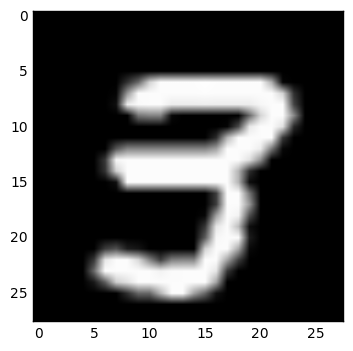

In [11]:
#t=np.array(x_train[2000,0,:,:,])
#x=np.rot90(t,2)
#x=np.rot90(x)

imgplot = plt.imshow((x_train[2000,0,:,:,]),cmap='gray')

In [12]:
from keras.models import Sequential
from keras.layers.convolutional import *
from keras.layers.core import Dropout, Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator


In [13]:
n_filters = 128
filter_size1 = 3
filter_size2 = 2
pool_size1 = 2
pool_size2 = 1
n_dense = 128
opt = optimizers.adagrad(lr=0.01)

In [14]:
model = Sequential()

model.add(Convolution2D(n_filters, filter_size1, filter_size1, batch_input_shape=(None, 1, img_width, img_height), activation='relu', border_mode='valid'))

model.add(MaxPooling2D(pool_size=(pool_size1, pool_size1)))

model.add(Convolution2D(n_filters, filter_size1, filter_size1, activation='relu', border_mode='valid'))

model.add(MaxPooling2D(pool_size=(pool_size2, pool_size2)))


model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(n_dense))

model.add(Activation('relu'))


model.add(Dropout(0.5))

model.add(Dense(n_classes))

model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\jambuvr\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="valid", activation="relu", batch_input_shape=(None, 1, ...)`
  app.launch_new_instance()
C:\Users\jambuvr\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="valid", activation="relu")`


In [15]:
batch_size = 256
n_epochs = 10

model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=n_epochs,verbose=2,
          validation_split=.2)





Train on 33600 samples, validate on 8400 samples
Epoch 1/10
153s - loss: 0.4526 - acc: 0.8600 - val_loss: 0.1073 - val_acc: 0.9680
Epoch 2/10
257s - loss: 0.1337 - acc: 0.9610 - val_loss: 0.0632 - val_acc: 0.9794
Epoch 3/10
296s - loss: 0.0930 - acc: 0.9723 - val_loss: 0.0489 - val_acc: 0.9842
Epoch 4/10


MemoryError: 
Apply node that caused the error: Elemwise{Composite{(i0 * (i1 + Abs(i1)))}}(TensorConstant{(1L, 1L, 1..1L) of 0.5}, Elemwise{Add}[(0, 0)].0)
Toposort index: 64
Inputs types: [TensorType(float32, (True, True, True, True)), TensorType(float32, 4D)]
Inputs shapes: [(1L, 1L, 1L, 1L), (256L, 128L, 26L, 26L)]
Inputs strides: [(4L, 4L, 4L, 4L), (346112L, 2704L, 104L, 4L)]
Inputs values: [array([[[[ 0.5]]]], dtype=float32), 'not shown']
Outputs clients: [[MaxPoolGrad{ignore_border=True, mode='max', ndim=2}(Elemwise{Composite{(i0 * (i1 + Abs(i1)))}}.0, Pool{ignore_border=True, mode='max', ndim=2}.0, CorrMM_gradInputs{valid, (1, 1), (1, 1)}.0, TensorConstant{(2L,) of 3}, TensorConstant{(2L,) of 3}, TensorConstant{(2L,) of 0}), Pool{ignore_border=True, mode='max', ndim=2}(Elemwise{Composite{(i0 * (i1 + Abs(i1)))}}.0, TensorConstant{(2L,) of 3}, TensorConstant{(2L,) of 3}, TensorConstant{(2L,) of 0})]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [ ]:
#predicting images on the validation data
yPred = model.predict_classes(x_valid,batch_size=32,verbose=1)

np.savetxt('mnist_output.csv', np.c_[range(1,len(yPred)+1),yPred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')